Dataset visualization is very crucial in debugging and understanding the performance of the NN model. For instance, using the data visualization, you can see if you have outliers, imbalanced dataset, distribution of your features etc. Understanding these will greatly help in debugging the NN model performance.

## Imports 

In [64]:
import os, sys
import csv
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import random
import math

import seaborn as sns
from sklearn.preprocessing import scale
from scipy.stats import boxcox

## Import Datset

Dataset_path is the dataset you want to visualize. This is a CSV file which will have the following format:
"kx", "ky", "ifmx", "ifmy", "zin", "zout", "stridex", "stridey", "pad_x", "pad_y", "group", "Energy", "Latency"

where,

* kx = Kernel size_x
* ky = Kernel size_y
* ifmx = Input size_x
* ifmy = Input size_y
* zin = # of Input Channels
* zout = # of Output Channels
* stridex = Stride in x direction
* stridey = Stride in y direction
* pad_x = padding along width
* pad_y = padding along height
* group = # of groups
* Energy = Energy for the layer with the above hyperparameters
* Latency = latency for the layer with the above hyperparameters


In [69]:
# Make sure you give the path to the dataset
dataset_path = "/home/USER/workspace/bbox_energy_model/bbox_collector_energy/clean/energy_latency_dataset_merged.csv"
num_data = sum(1 for line in open(dataset_path)) -1 

# Sample size < num_data
sample_size = 100000

In [65]:
def read_samples(filename, sample_size):
    skip = sorted(random.sample(range(1, num_data+1), num_data-sample_size))
    df = pd.read_csv(filename, skiprows=skip, error_bad_lines=False)
    df.columns = ["kx", "ky", "ifmx", "ifmy", "zin", "zout", "stridex", "stridey", "pad_x", "pad_y", "group", "Energy", "Latency" ]
    return df

sampled_df = read_samples(dataset_path, sample_size)

In [66]:
sampled_df_top = sampled_df.head(5)
sampled_df_top

,kx,ky,ifmx,ifmy,zin,zout,stridex,stridey,pad_x,pad_y,group,Energy,Latency
0,1,1,256,256,1008,2544,1,1,0,0,1,2.885328e+10,165215476
1,1,1,256,256,1008,2472,1,1,0,0,1,2.813196e+10,161085233
2,1,1,256,256,1016,2424,2,2,0,0,1,1.086327e+10,72951998
3,1,1,256,256,1016,2296,2,2,0,0,1,1.029153e+10,69112724
4,1,1,256,256,1008,2264,1,1,0,0,1,2.596797e+10,148694504


### General Statistics about the dataset

In [67]:
sampled_df.describe()

,kx,ky,ifmx,ifmy,zin,zout,stridex,stridey,pad_x,pad_y,group,Energy,Latency
count,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05
mean,4.646940,4.646940,204.48288,204.48288,622.110790,1314.886480,1.504470,1.504470,0.829580,0.829580,5.932790,1.511578e+11,9.682133e+08
std,3.289316,3.289316,76.70544,76.70544,654.669132,740.065283,0.499983,0.499983,0.833657,0.833657,62.916292,4.777230e+11,3.058384e+09
min,1.000000,1.000000,8.00000,8.00000,3.000000,16.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.457984e+04,5.080000e+02
25%,2.000000,2.000000,168.00000,168.00000,136.000000,672.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.133273e+09,1.266787e+07
50%,3.000000,3.000000,232.00000,232.00000,320.000000,1320.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.476486e+10,9.070633e+07
75%,7.000000,7.000000,248.00000,248.00000,904.000000,1960.000000,2.000000,2.000000,2.000000,2.000000,1.000000,8.546206e+10,5.414990e+08
max,11.000000,11.000000,512.00000,512.00000,2584.000000,2584.000000,2.000000,2.000000,2.000000,2.000000,2584.000000,1.033828e+13,6.042789e+10


### Drop the duplicate columns

In [6]:
sampled_df_uniq = sampled_df.drop(columns = ['ky','stridey', 'pad_y'], axis=1)

## Kernel sizes vs Energy and Latency

### How Kernels sizes affect the Energy and Latency

In [7]:
kernel_energy_latency_df = sampled_df_uniq[['kx', 'Energy', 'Latency']]

## Pair Plot

Pair plot plots the distribution as well as scatter plot between two variables. The diagonal elements gives the histogram of the features and the non-diagonal gives the scatter plot between two variables.

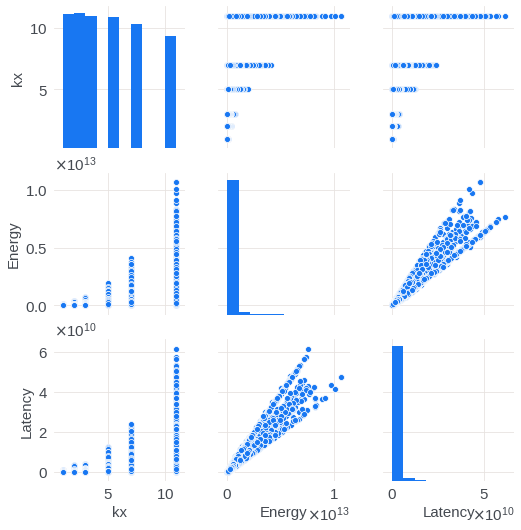

In [62]:
sns.pairplot(kernel_energy_latency_df)

#### Key observations
* kernel distribution (1st row, 1st column) is uniform. 
* Energy distribution (2nd row, 2 column) is right skewed.
* Latency distribution (3rd row, 3rd column) is right skewed.
* Energy and Latency seems to be correlated. (3rd row, 2nd column or 2nd row, 3rd column)



### Transform the energy and latency 

In [ ]:
kernel_energy_latency_df['log_energy'] = np.log10(kernel_energy_latency_df['Energy'])
kernel_energy_latency_df['log_latency'] = np.log10(kernel_energy_latency_df['Latency'])

kernel_energy_latency_df = kernel_energy_latency_df.drop(columns=["Energy", "Latency"], axis=1)

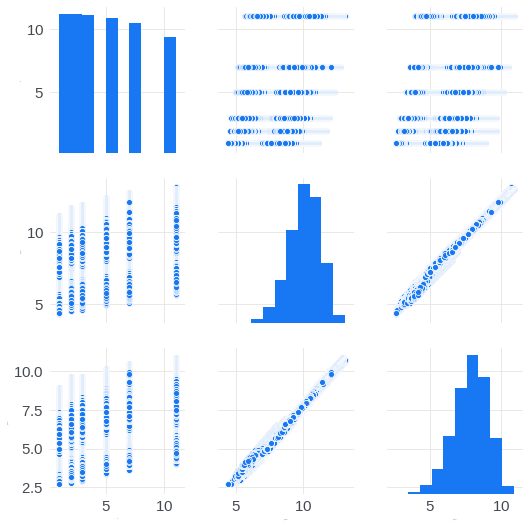

In [20]:
sns.pairplot(kernel_energy_latency_df)


#### Key observations
* kernel distribution (1st row, 1st column) is uniform. 
* Energy distribution (2nd row, 2 column) is near normal
* Latency distribution (3rd row, 3rd column) is near normal.
* Energy and Latency seems to be correlated. (3rd row, 2nd column or 2nd row, 3rd column)


## Input channels vs Energy and Latency

Demonstrating how to sample a particular feature from the dataset using Pandas

In [ ]:
zin_energy_latency_df = sampled_df_uniq[['zin', 'Energy', 'Latency']]
zin_energy_latency_df['log_energy'] = np.log10(zin_energy_latency_df['Energy'])
zin_energy_latency_df['log_latency'] = np.log10(zin_energy_latency_df['Latency'])
zin_energy_latency_df['log2_zin'] = np.log2(zin_energy_latency_df['zin'])
 
# drop the non-transformed
zin_energy_latency_df = zin_energy_latency_df.drop(columns=["Energy", "Latency", "zin"], axis=1)

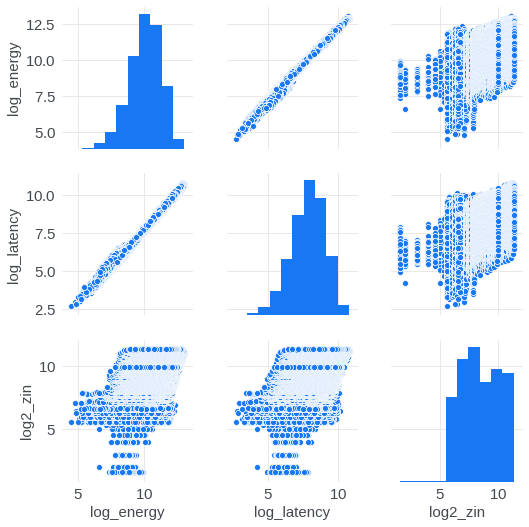

In [64]:
sns.pairplot(zin_energy_latency_df)


## Output Channels vs Latency and Energy

In [24]:
zout_energy_latency_df = sampled_df_uniq[['zout', 'Energy', 'Latency']]
zout_energy_latency_df['log_energy'] = np.log10(zout_energy_latency_df['Energy'])
zout_energy_latency_df['log_latency'] = np.log10(zout_energy_latency_df['Latency'])
#zout_energy_latency_df['log2_z'] = np.log2(zout_energy_latency_df['zin'])
 
# drop the non-transformed
zout_energy_latency_df = zout_energy_latency_df.drop(columns=["Energy", "Latency"], axis=1)

/data/users/USER/.bento/kernels/bento_kernel_pytorch/latest/bento_kernel_pytorch:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/data/users/USER/.bento/kernels/bento_kernel_pytorch/latest/bento_kernel_pytorch:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



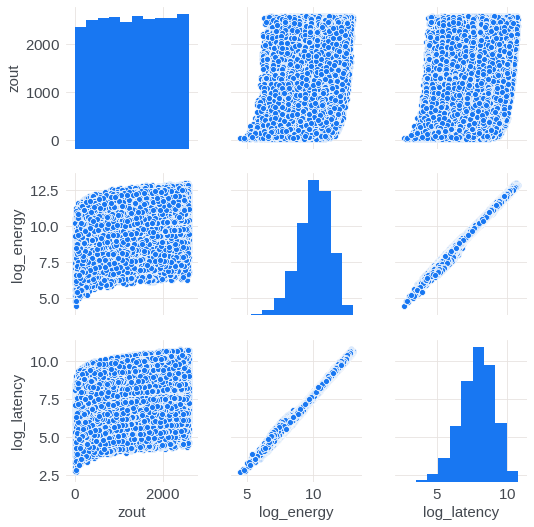

In [65]:
sns.pairplot(zout_energy_latency_df)


## Padding, Stride, and groups vs latency and Energy

In [ ]:
pad_stride_groups_energy_latency_df = sampled_df_uniq[['pad_x', "stridex", "group",'Energy', 'Latency']]
pad_stride_groups_energy_latency_df['log_energy'] = np.log10(pad_stride_groups_energy_latency_df['Energy'])
pad_stride_groups_energy_latency_df['log_latency'] = np.log10(pad_stride_groups_energy_latency_df['Latency'])

# drop the non-transformed
pad_stride_groups_energy_latency_df = pad_stride_groups_energy_latency_df.drop(columns=["Energy", "Latency"], axis=1)

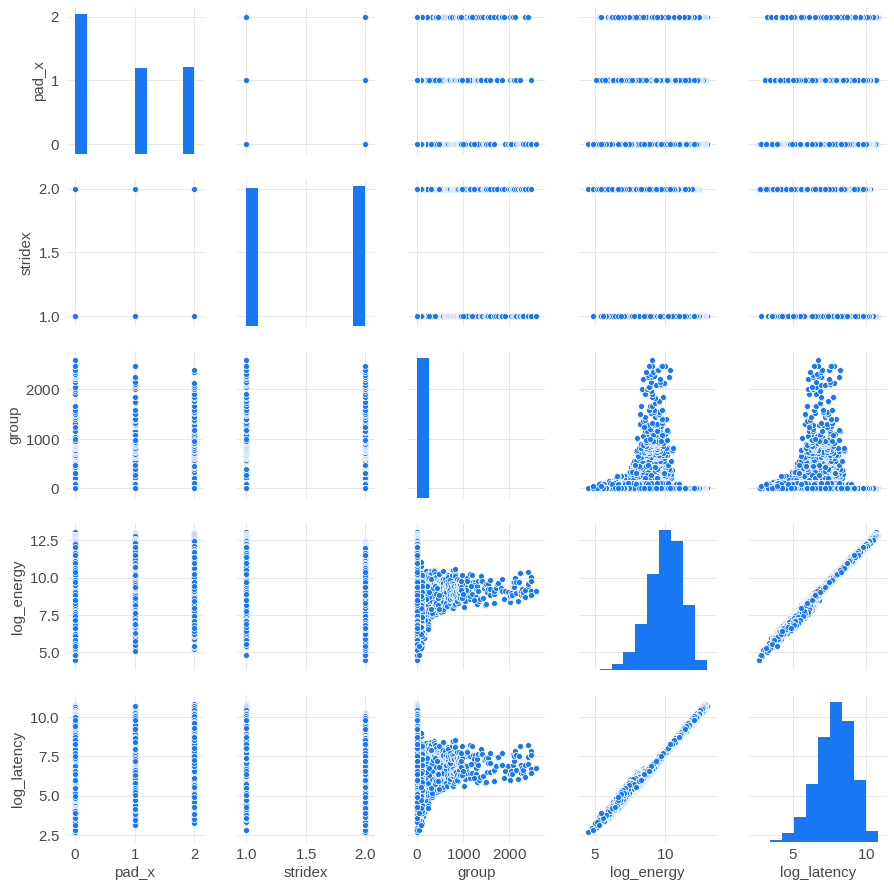

In [69]:
sns.pairplot(pad_stride_groups_energy_latency_df)

## Zin, Zout 

In [45]:
zin_zout_groups_energy_latency_df = sampled_df_uniq[["zin", "zout", "Energy", "Latency"]]

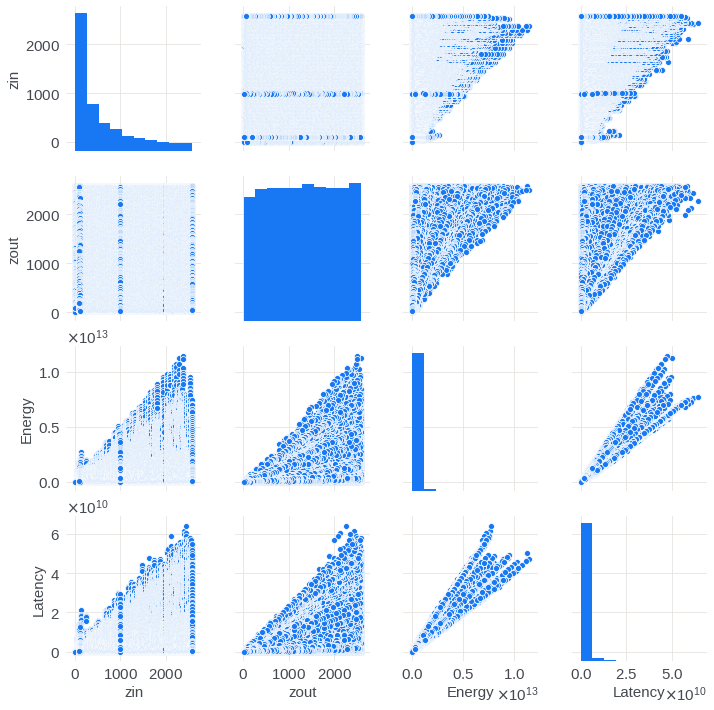

In [11]:
sns.pairplot(zin_zout_groups_energy_latency_df)

## Transform features into flops and memory cost

In [9]:
def count_flops(hyperparams):
    kx = hyperparams[0]
    ky = kx
    ifmx = hyperparams[1]
    ifmy = ifmx
    zin = hyperparams[2]
    zout = hyperparams[3]
    sx = hyperparams[4]
    sy = sx
    px = hyperparams[5]
    py = px
    g = hyperparams[6]
    
    n =  (kx * ky * zin)+1
    ofmx = math.floor(((ifmx - kx) +2*px)/sx)+1
    ofmy = math.floor(((ifmy - ky) +2*py)/sy)+1
    
    ofm_total = ofmx*ofmy
    
    total_ops = (ofm_total * n * zout) // g
    
    #kernel_memory = kx * ky * zin * zout
    kernel_memory = total_ops / (ifmx*ifmy)
    ifm_memory = ifmx * ifmy * zin
    
    #ofm_memory = ofmx * ofmy * zout
    ofm_memory = (total_ops * g)/zin
    
    total_memory = kernel_memory + ifm_memory + ofm_memory
    
    return total_ops, total_memory

In [10]:
sampled_df_uniq.head(2)

,kx,ifmx,zin,zout,stridex,pad_x,group,Energy,Latency
0,1,256,1008,2528,1,0,1,2.885328e+10,165215476
1,1,256,1016,2448,1,0,1,4.459046e+10,299301971


In [11]:
sample_uniq_np = sampled_df_uniq.to_numpy()

## Estiamte the Flops and Memory Cost from the layer spec

In [12]:
flops = []
memory_cost = []
for each_layer in sample_uniq_np:
    each_flops, each_mem = count_flops(each_layer)
    flops.append(each_flops)
    memory_cost.append(each_mem)



In [13]:
sampled_df_uniq['Flops'] = flops
sampled_df_uniq['Memory'] = memory_cost

In [14]:
sampled_df_uniq.drop_duplicates(subset=['kx', 'ifmx', 'zin', 'zout', 'stridex', 'pad_x', 'group'], keep='first')

,kx,ifmx,zin,zout,stridex,pad_x,group,Energy,Latency,Flops,Memory
0,1,256,1008,2528,1,0,1,2.885328e+10,165215476,1.671661e+11,2.344504e+08
1,1,256,1016,2448,1,0,1,4.459046e+10,299301971,1.631595e+11,2.296642e+08
2,1,256,1016,2312,2,0,1,1.057740e+10,71032361,3.852376e+10,1.050895e+08
3,1,256,1008,2288,1,0,1,2.596797e+10,148694504,1.512959e+11,2.184640e+08
4,1,256,1016,2224,2,0,1,1.000565e+10,67193087,3.705746e+10,1.036239e+08
...,...,...,...,...,...,...,...,...,...,...,...
99995,5,240,1000,416,2,0,1,2.505774e+10,191958884,1.448154e+11,2.049295e+08
99996,5,240,992,64,2,1,1,4.278813e+09,22378846,2.247725e+10,8.018794e+07
99997,7,240,1000,2536,2,2,1,2.885332e+11,2231908996,1.759738e+12,1.847889e+09
99998,7,240,992,2440,1,0,1,1.296515e+12,6545343422,6.494388e+12,6.716651e+09


In [15]:
sampled_df_uniq = sampled_df_uniq[['kx', 'ifmx', 'zin', 'zout', 'stridex', 'pad_x', 'group', 'Flops', 'Memory', 'Latency', 'Energy']]

In [39]:
flops_mem_energy_latency_df = sampled_df_uniq[["Flops", "Memory", "Latency", "Energy", "kx", "pad_x", "stridex"]]
flops_mem_energy_latency_df.describe()

,Flops,Memory,Latency,Energy,kx,pad_x,stridex
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000
mean,8.733809e+11,1.249517e+09,9.610978e+08,1.503045e+11,4.640290,0.829530,1.501810
std,2.727220e+12,2.759771e+09,3.001978e+09,4.707496e+11,3.288335,0.832945,0.499999
min,7.840000e+02,3.868250e+03,5.080000e+02,3.264899e+04,1.000000,0.000000,1.000000
25%,1.087879e+10,7.967852e+07,1.273477e+07,2.147065e+09,2.000000,0.000000,1.000000
50%,8.281435e+10,2.755491e+08,9.186318e+07,1.495321e+10,3.000000,1.000000,2.000000
75%,4.936864e+11,1.093289e+09,5.406784e+08,8.572763e+10,7.000000,2.000000,2.000000
max,4.708303e+13,7.068504e+10,5.887850e+10,1.085495e+13,11.000000,2.000000,2.000000


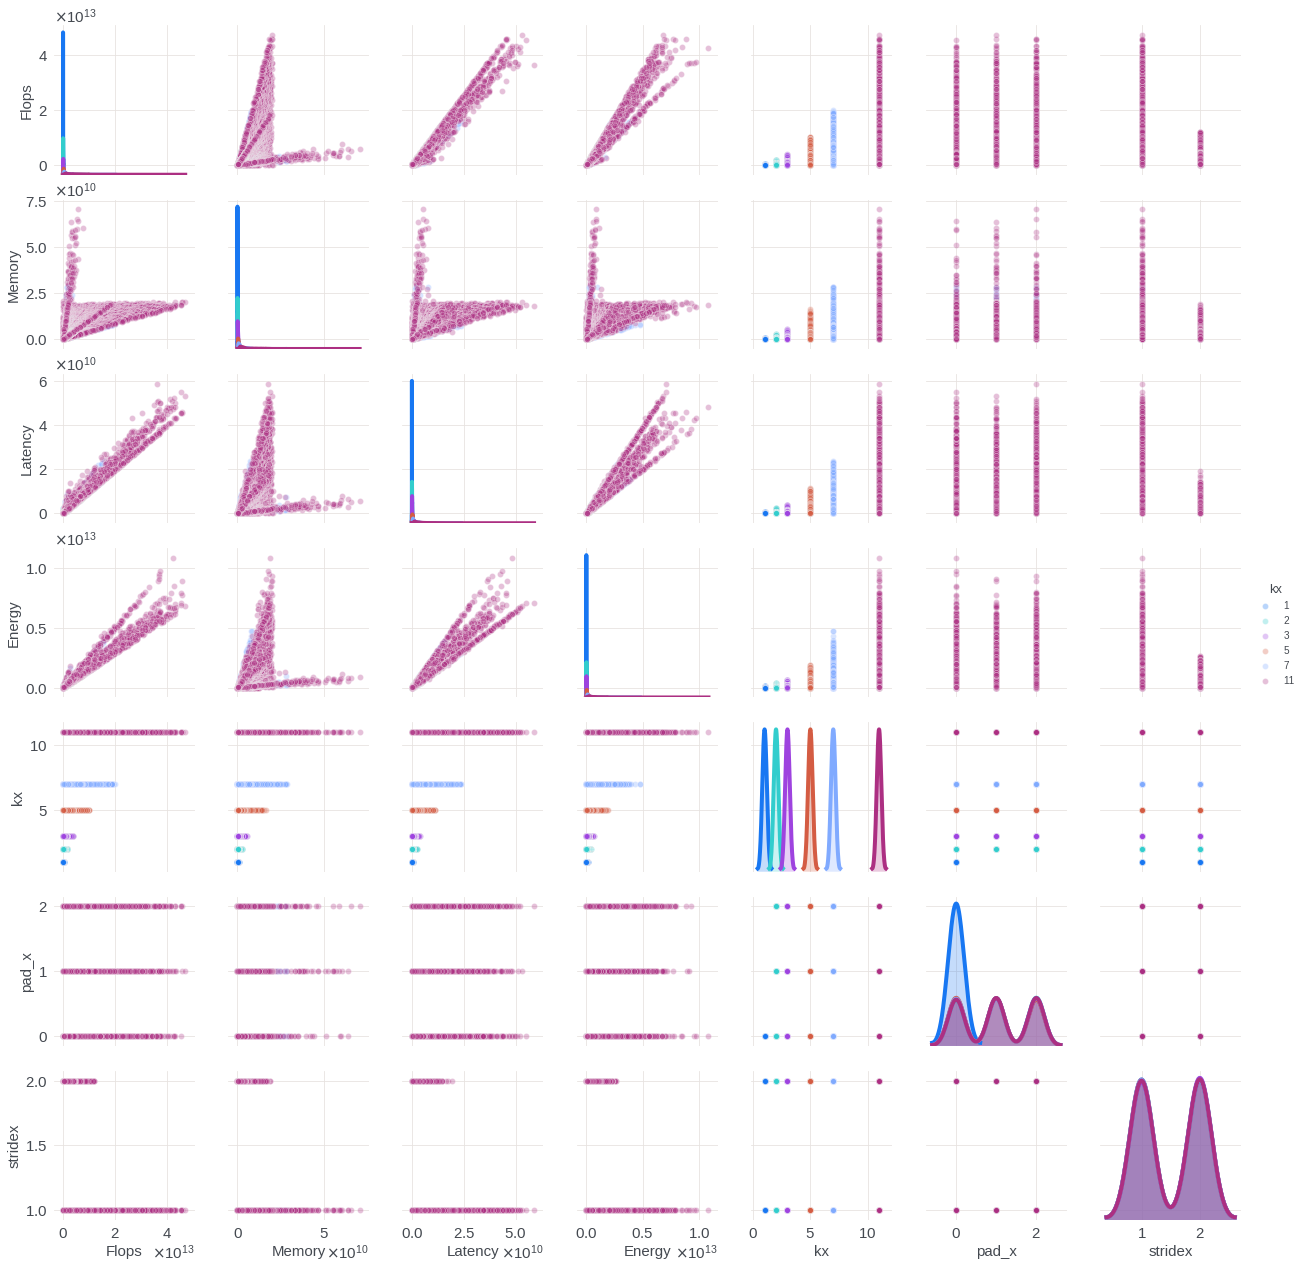

In [63]:
sns.pairplot(flops_mem_energy_latency_df, hue='kx', diag_kws={'bw':0.2}, plot_kws={'alpha':0.3})

In [51]:
flops_mem_energy_latency_df_kx_2 = flops_mem_energy_latency_df[flops_mem_energy_latency_df["kx"]==2]
flops_mem_energy_latency_df_kx_2.describe()


,Flops,Memory,Latency,Energy,kx,pad_x,stridex
count,1.745500e+04,1.745500e+04,1.745500e+04,1.745500e+04,17455.0,17455.000000,17455.000000
mean,1.232339e+11,1.980406e+08,1.278067e+08,2.215983e+10,2.0,1.014838,1.503924
std,2.207916e+11,2.109683e+08,2.332179e+08,4.043327e+10,0.0,0.814289,0.499999
min,1.744000e+04,1.587127e+04,1.143000e+03,1.004840e+05,2.0,0.000000,1.000000
25%,5.806063e+09,5.057827e+07,6.234842e+06,1.135188e+09,2.0,0.000000,1.000000
50%,3.339522e+10,1.358849e+08,3.479379e+07,6.033256e+09,2.0,1.000000,2.000000
75%,1.340898e+11,2.701141e+08,1.379425e+08,2.334638e+10,2.0,2.000000,2.000000
max,1.720364e+12,2.763227e+09,2.651810e+09,4.248138e+11,2.0,2.000000,2.000000


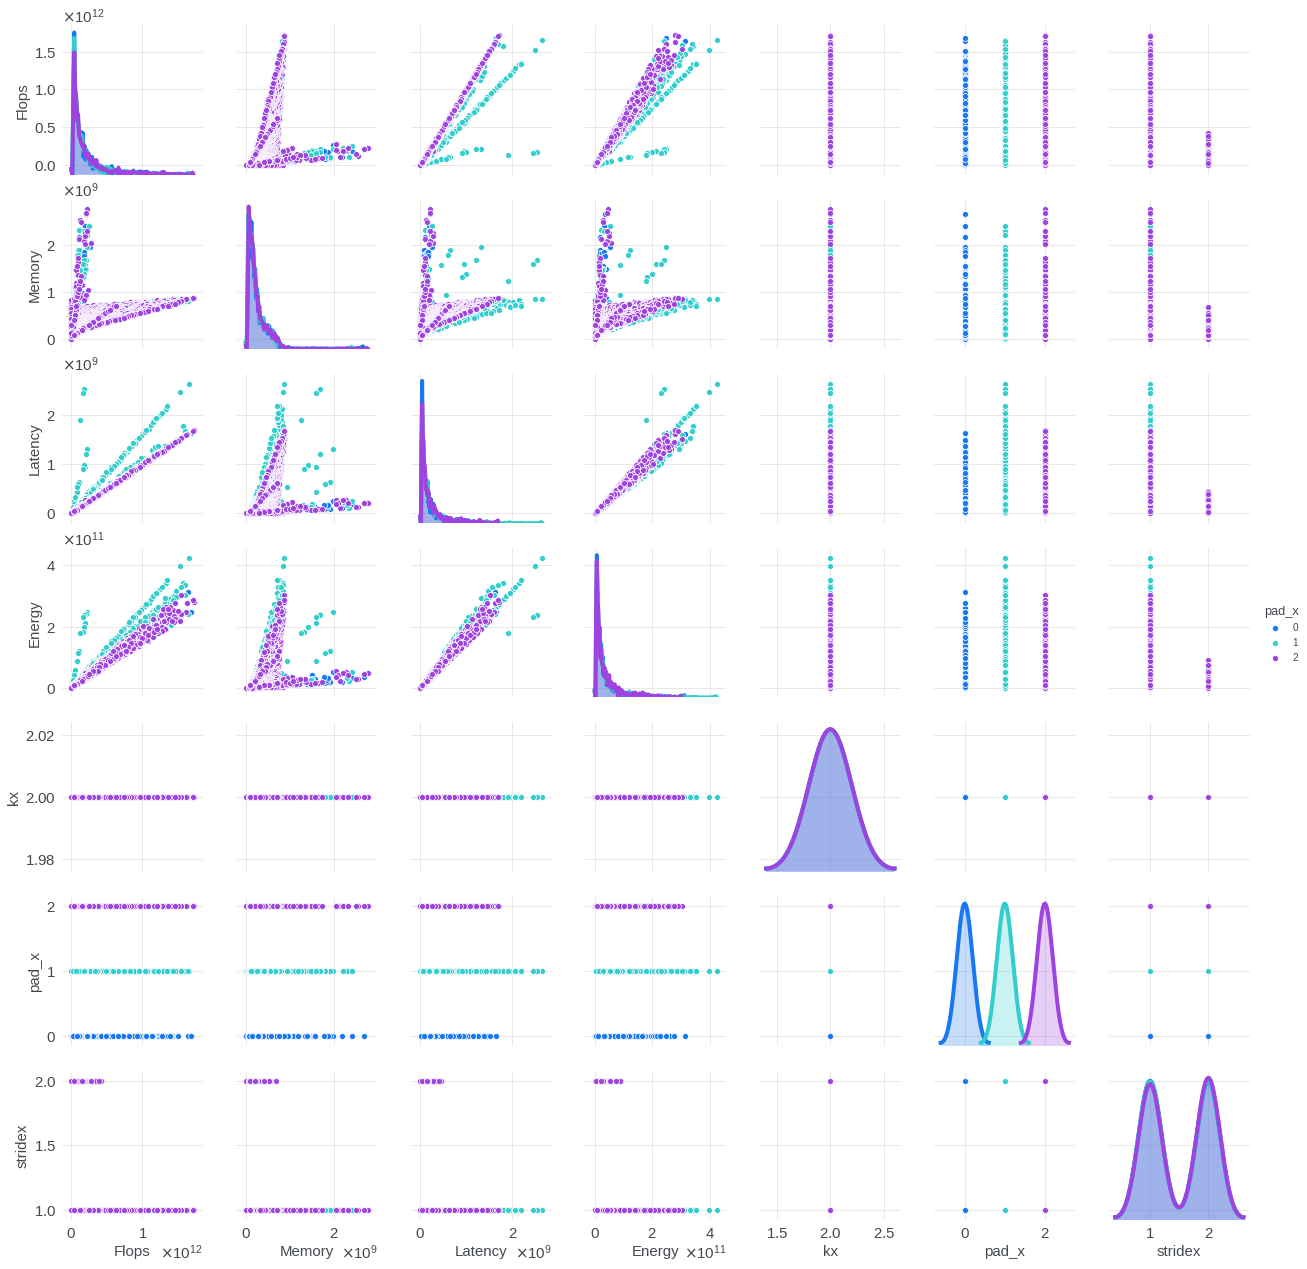

In [56]:
sns.pairplot(flops_mem_energy_latency_df_kx_2, hue='pad_x', diag_kws={'bw':0.2})